1. Import Necessary Libraries

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2. Load the Dataset

In [53]:
data=pd.read_csv('data.csv')
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [54]:
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3. Check Data Types

In [55]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

4. Drop Irrelevant Columns

In [56]:
to_drop=['Engine Fuel Type', 'Market Category','Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']
data=data.drop(columns=to_drop,axis=1)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


5. Rename Columns

In [57]:
data.rename(columns={'Engine HP': 'HP','Engine Cylinders':'Cylinders',"Transmission Type" : 'Transmission','Driven_Wheels' : 'Drive Mode','highway MPG' : 'MPG-H','city mpg' : 'MPG-C','MSRP' : 'Price'}, inplace=True)
data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


6. Drop Duplicate Rows

In [58]:
print("Original shape of the dataset:", data.shape)
num_duplicates = data.duplicated().sum()
print("Number of duplicated rows:", num_duplicates)
data=data.drop_duplicates()
print("New shape of the dataset:", data.shape)

Original shape of the dataset: (11914, 10)
Number of duplicated rows: 989
New shape of the dataset: (10925, 10)


7. Statistical Summary

In [59]:
data.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,10925.000000,10856.000000,10895.000000,10925.000000,10925.000000,1.092500e+04
mean,2010.917895,254.399503,5.668196,26.654737,19.770801,4.249660e+04
std,7.016102,109.771351,1.799464,9.031109,9.259532,6.205353e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.092000e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


8. Handle Missing Values

In [60]:
print("Sum of missing values before cleaning:")
print(data.isnull().sum())
data = data.dropna()
print("\nSum of missing values after cleaning:")
print(data.isnull().sum())

Sum of missing values before cleaning:
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

Sum of missing values after cleaning:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


9. Data Visualization

Horsepower (HP) vs Price.

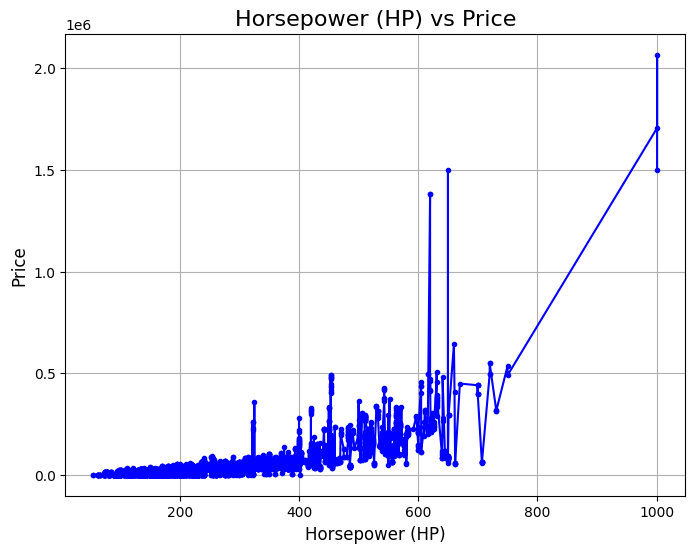

In [61]:
plt.figure(figsize=(8, 6))
sorted_data = data.sort_values(by='HP')
plt.plot(sorted_data['HP'], sorted_data['Price'], linestyle='-', marker='.', color='b')
plt.title('Horsepower (HP) vs Price', fontsize=16)
plt.xlabel('Horsepower (HP)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

Sales by Year.

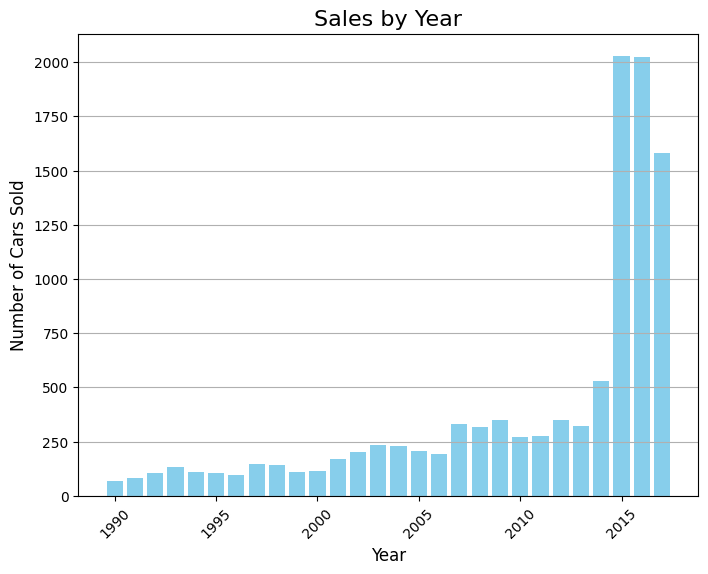

In [62]:
plt.figure(figsize=(8, 6))
sales_by_year = data['Year'].value_counts().sort_index()
plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue')
plt.title('Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Number of Cars in Each Year.

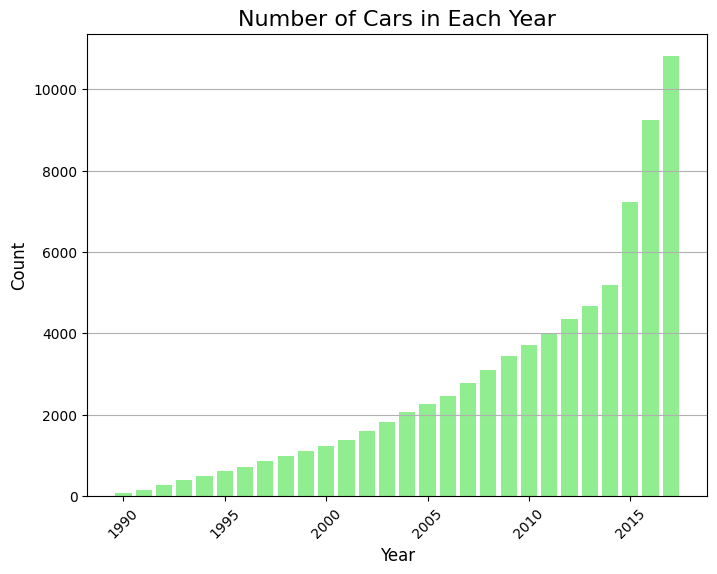

In [63]:
plt.figure(figsize=(8, 6))
num_cars_by_year = data['Year'].value_counts().sort_index()
cumulative_cars = num_cars_by_year.cumsum()
plt.bar(cumulative_cars.index, cumulative_cars.values, color='lightgreen')
plt.title('Number of Cars in Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Preferred Drive Mode

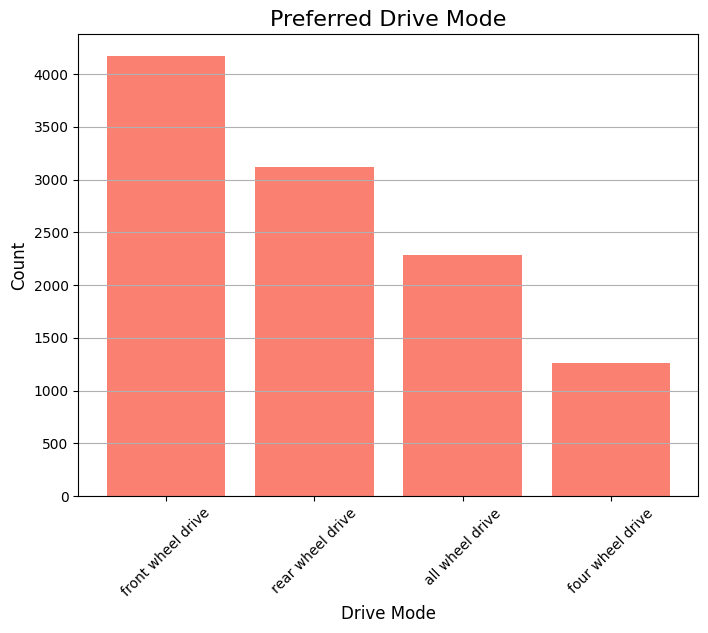

In [64]:
plt.figure(figsize=(8, 6))
drive_mode_counts = data['Drive Mode'].value_counts()
plt.bar(drive_mode_counts.index, drive_mode_counts.values, color='salmon')
plt.title('Preferred Drive Mode', fontsize=16)
plt.xlabel('Drive Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Highway MPG (MPG-H) vs City MPG (MPG-C).

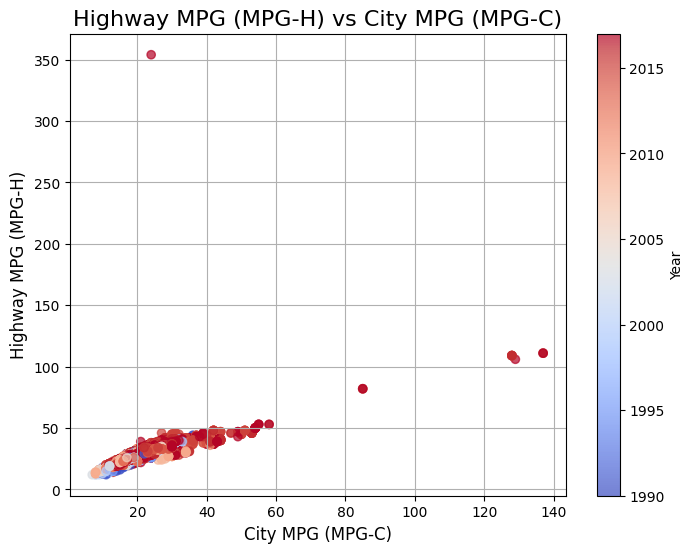

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(data['MPG-C'], data['MPG-H'], c=data['Year'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Year')
plt.title('Highway MPG (MPG-H) vs City MPG (MPG-C)', fontsize=16)
plt.xlabel('City MPG (MPG-C)', fontsize=12)
plt.ylabel('Highway MPG (MPG-H)', fontsize=12)
plt.grid(True)
plt.show()

Transmission Type (Transmission) vs MPG-H

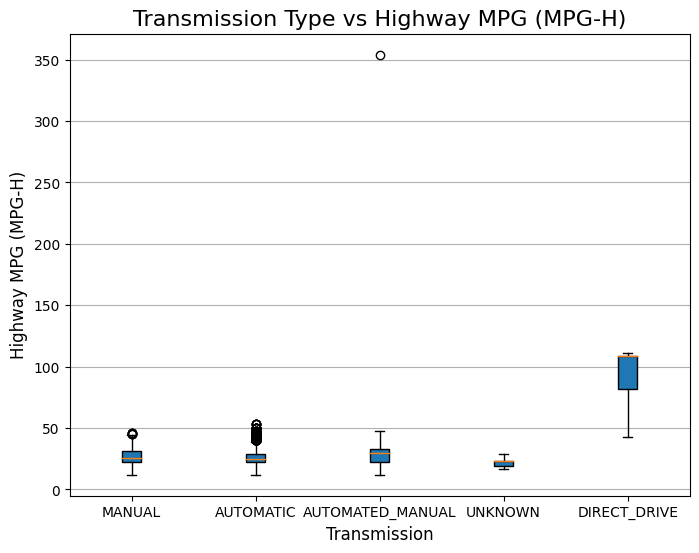

In [66]:
plt.figure(figsize=(8, 6))
transmission_types = data['Transmission'].unique()
for t in transmission_types:
    subset = data[data['Transmission'] == t]
    plt.boxplot(subset['MPG-H'], positions=[list(transmission_types).index(t)], labels=[t], patch_artist=True)
plt.title('Transmission Type vs Highway MPG (MPG-H)', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Highway MPG (MPG-H)', fontsize=12)
plt.grid(axis='y')
plt.show()

Transmission Type (Transmission) vs MPG-C

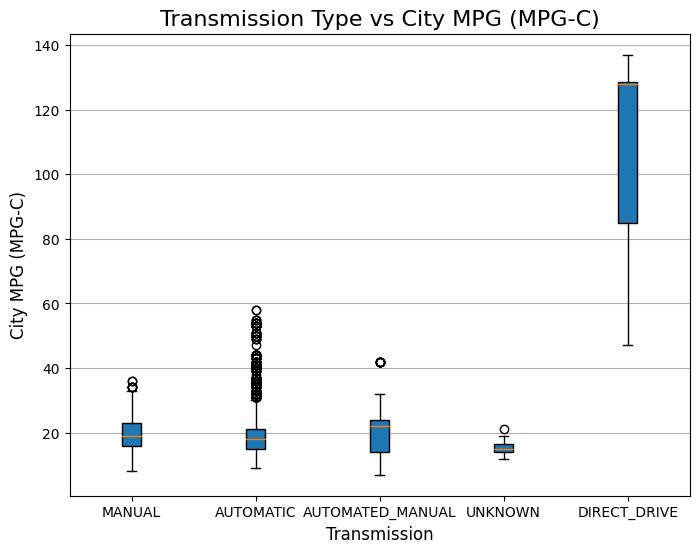

In [67]:
plt.figure(figsize=(8, 6))
for t in transmission_types:
    subset = data[data['Transmission'] == t]
    plt.boxplot(subset['MPG-C'], positions=[list(transmission_types).index(t)], labels=[t], patch_artist=True)
plt.title('Transmission Type vs City MPG (MPG-C)', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('City MPG (MPG-C)', fontsize=12)
plt.grid(axis='y')
plt.show()

Correlation Matrix and Heatmap

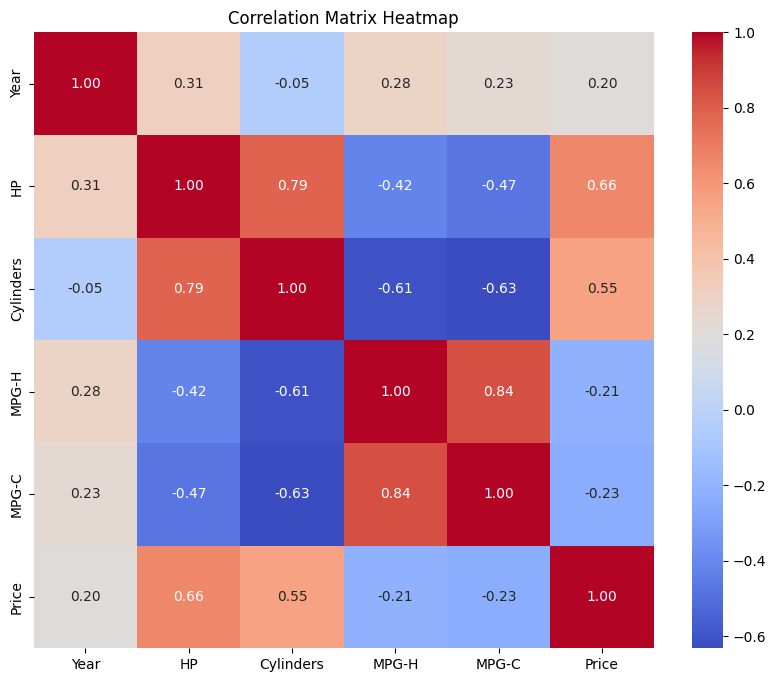

In [68]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()